In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('/content/sample_data/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [9]:
median_salary = df['Salary'].median()
df['HighSalary'] = (df['Salary'] >= median_salary).astype(int)
df[['Salary', 'HighSalary']].head()

,Salary,HighSalary
0,90000.0,0
1,65000.0,0
2,150000.0,1
3,60000.0,0
4,200000.0,1


In [10]:
df_log = df[['Years of Experience', 'HighSalary']].dropna()
X = df_log[['Years of Experience']].values
y = df_log['HighSalary'].values
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}")

Samples: 6701, Features: 1


In [11]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
print(f"Intercept: {log_reg.intercept_[0]}")
print(f"Coefficient: {log_reg.coef_[0][0]}")

Intercept: -3.9519281229774816
Coefficient: 0.5679995741935702


In [12]:
y_pred = log_reg.predict(X)
print(f"Accuracy: {accuracy_score(y, y_pred)}")
print("\nClassification Report:\n", classification_report(y, y_pred))

Accuracy: 0.8512162363826294

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      3296
           1       0.85      0.86      0.85      3405

    accuracy                           0.85      6701
   macro avg       0.85      0.85      0.85      6701
weighted avg       0.85      0.85      0.85      6701



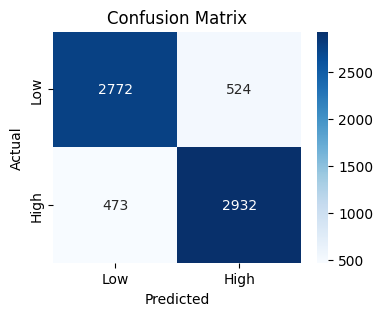

In [13]:
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low','High'], yticklabels=['Low','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

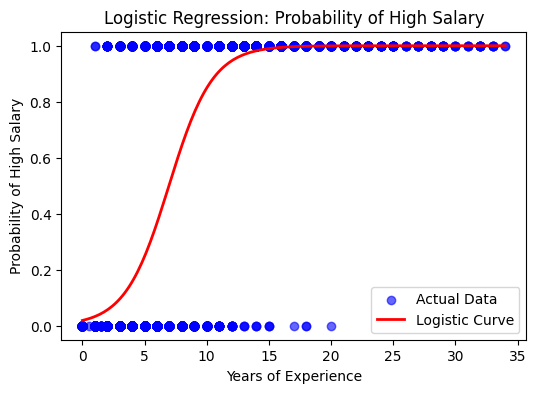

In [14]:
X_range = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
y_prob = log_reg.predict_proba(X_range)[:,1]
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
plt.plot(X_range, y_prob, color='red', linewidth=2, label='Logistic Curve')
plt.title('Logistic Regression: Probability of High Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Probability of High Salary')
plt.legend()
plt.show()